In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from IPython.display import display
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/fruitspec-lab/anaconda3/envs/FsCounterGPUtest/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_cv_org = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/features_1308_new_translator.csv")
df_cv_org

,Unnamed: 0,total_foliage,total_orange,width,height,volume,surface_area,perimeter,avg_width,avg_height,...,cv,cv1,cv2,cv3,cv4,cv5,block_name,name,customer,cont
0,0,121.197176,2.193163,2.698580,3.662066,6.981767,6.716055,5.278098,2.293109,2.742305,...,283,283,218,188,173,156,DWDBCL46,R203_S1_T1,DEWAGD,NaN
1,1,141.728919,1.861267,2.621310,3.149426,5.665482,3.675360,2.589877,2.300400,2.837043,...,248,248,183,156,146,136,DWDBCL46,R203_S2_T1,DEWAGD,NaN
2,2,161.993857,1.517138,2.659224,3.708786,6.866103,3.984093,2.936604,2.288443,3.314990,...,158,158,119,105,96,85,DWDBCL46,R21_S1_T1,DEWAGD,NaN
3,3,153.789183,1.884458,2.683011,3.416385,6.438434,3.458153,3.079964,2.343283,3.005899,...,173,173,141,131,115,105,DWDBCL46,R21_S2_T1,DEWAGD,NaN
4,4,156.639359,2.846400,2.849478,3.760399,7.993428,4.199263,3.035079,2.710563,2.808083,...,290,290,214,194,179,160,DWDBCL46,R23_S1_T1,DEWAGD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1099,41.094979,1.016776,2.029849,2.149801,2.318965,3.234597,2.167204,1.755722,1.756515,...,55,55,35,31,25,22,SUMGLD,R9_S1_T45,SHANIR,NaN
1100,1100,72.971416,1.829669,3.250959,2.383060,6.593659,3.506743,2.830342,2.982827,1.939560,...,84,84,60,48,41,38,SUMGLD,R9_S1_T46,SHANIR,NaN
1101,1101,54.737655,1.126030,2.230621,2.229724,2.904498,3.565306,2.365303,1.660924,1.815551,...,64,64,44,37,30,23,SUMGLD,R9_S1_T47,SHANIR,NaN
1102,1102,59.176816,0.672317,2.114065,2.435368,2.849507,3.169792,1.928470,1.620145,1.867314,...,45,45,18,17,14,11,SUMGLD,R9_S1_T48,SHANIR,NaN


# unrelated- testing for new feature: cv decay rate

In [4]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
f_df = read_f_df(cfg)
df_cv_w_f = add_fs(df_cv_org, f_df).reset_index(drop = True)
plot_fruit_var = get_plot_fruit_variety_df(cfg)
df_cv_w_f = pd.merge(df_cv_w_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")

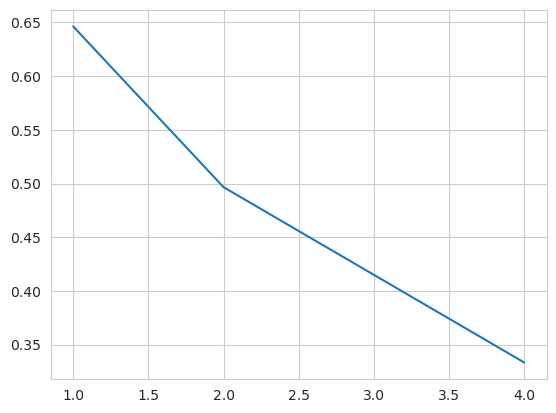

<AxesSubplot: xlabel='decay_rate', ylabel='% hidden'>

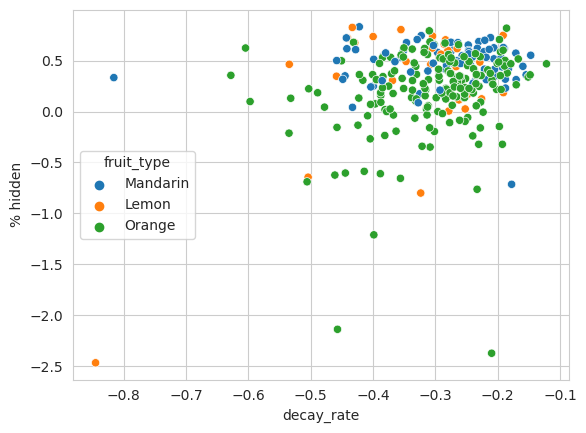

In [235]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# df_cv_w_f["% hidden"] = (df_cv_w_f["F"] - df_cv_w_f["cv1"])/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4], [x["cv2/cv1"], x["cv3/cv1"], x["cv4/cv1"], x["cv5/cv1"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")


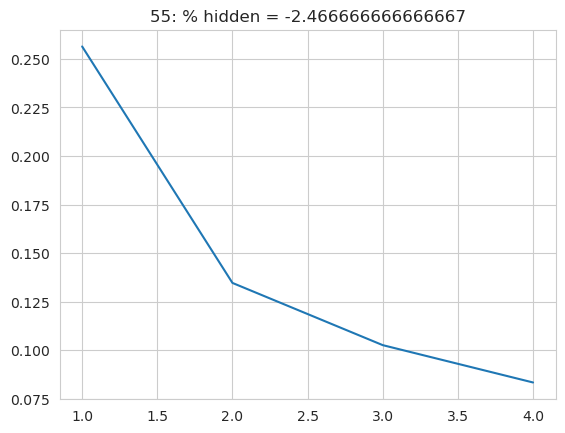

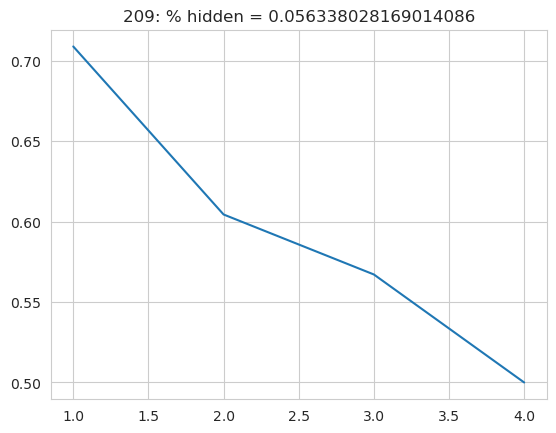

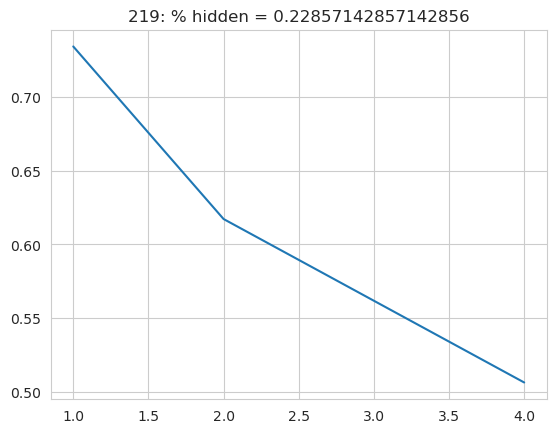

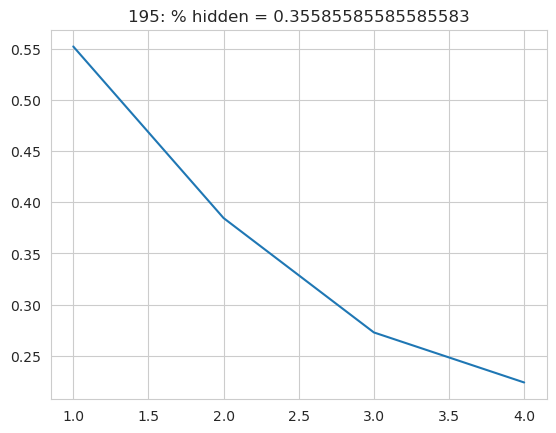

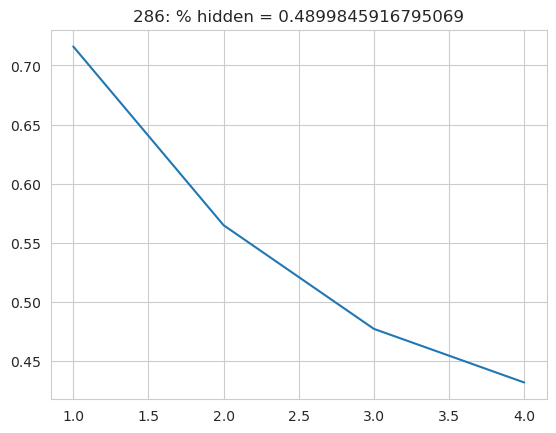

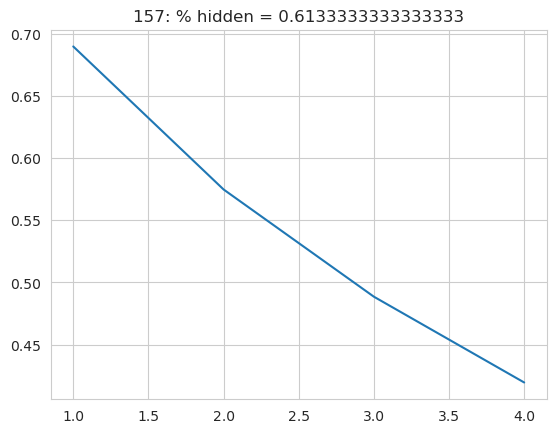

In [232]:
# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

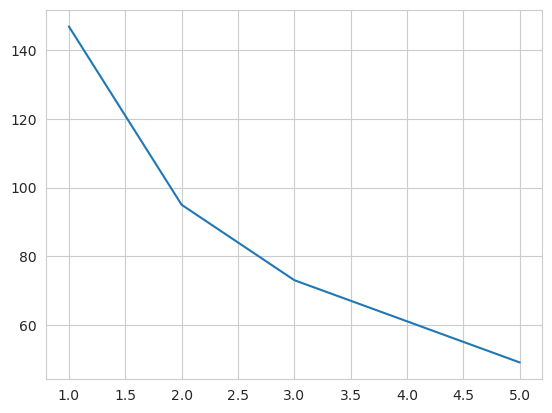

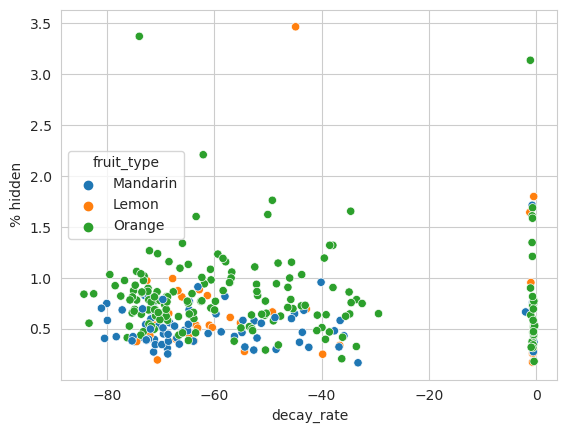

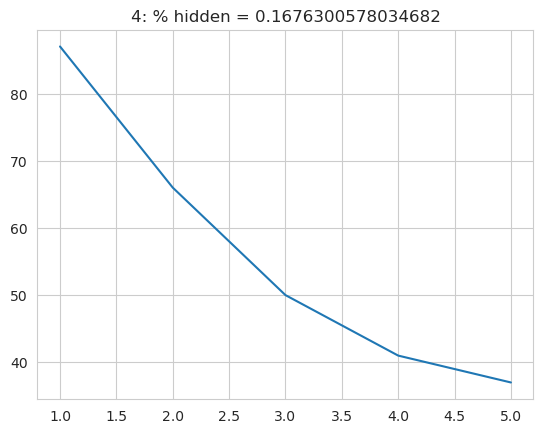

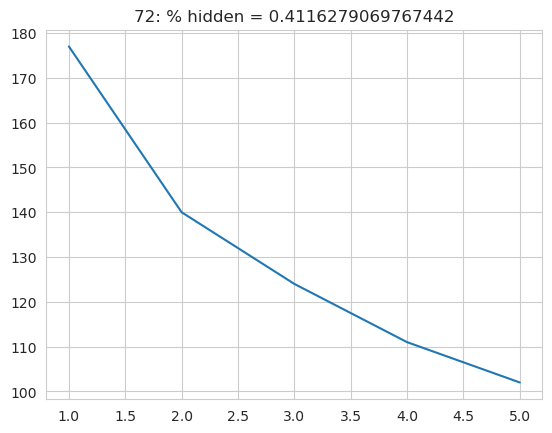

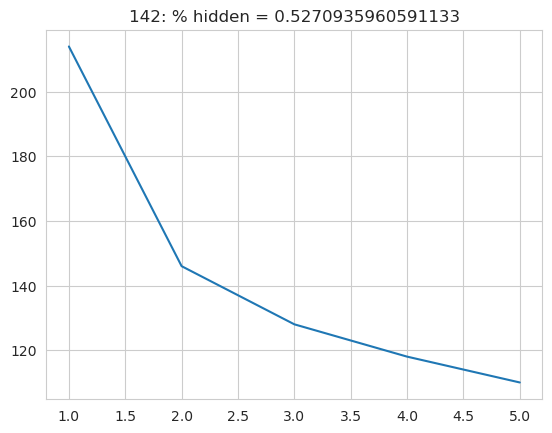

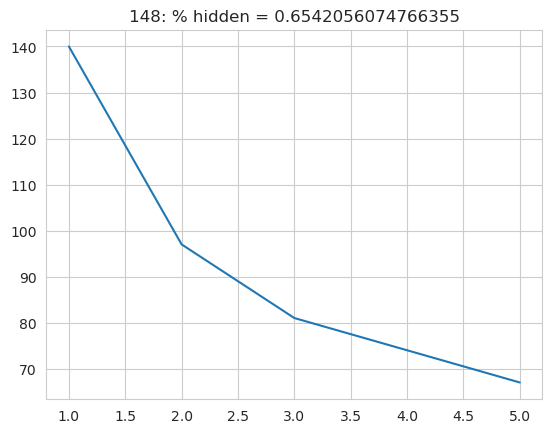

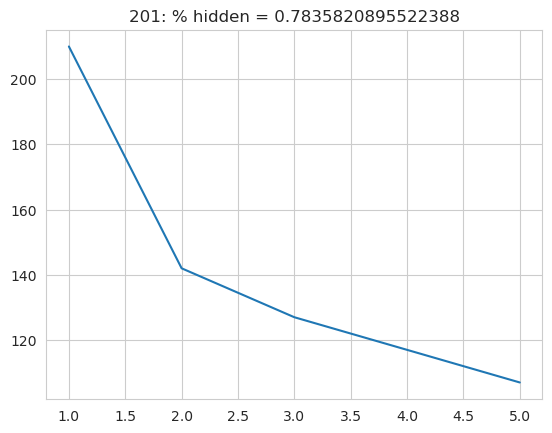

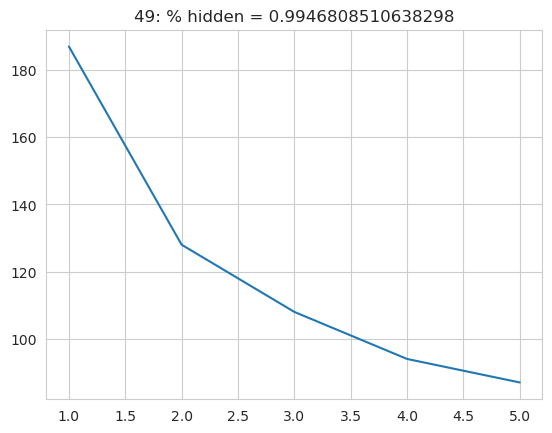

In [241]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# cv_ratio_cols = ["cv1","cv2", "cv3", "cv4", "cv5"]
# df_cv_w_f["% hidden"] = df_cv_w_f["cv1"]/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4,5], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4,5], [x["cv1"], x["cv2"], x["cv3"], x["cv4"], x["cv5"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")
# plt.show()

# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4,5], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

## filter

In [23]:
df_cv = df_cv_org[df_cv_org["customer"].isin(["DEWAGD", "PROPAL"])] #, "FOWLER", "MOTCHA"
df_cv = df_cv[df_cv["name"].str.endswith("1") | df_cv["customer"].isin(["FOWLER", "MOTCHA"])]
df_cv["block_name"] = df_cv["block_name"].replace({"2020injx": "2020injX", "injertos": "Injertos"})

## Add Fs

In [24]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
cfg.drop_customer: ["MOTCHADS"]
f_df = read_f_df(cfg)

### handling motcha and fowler

In [25]:
f_df_serinal = f_df[~f_df["tree_serial"].isna()]
base_tree_name = f_df_serinal["block_name"] + "_" + "R0_T" + f_df_serinal["tree_serial"].astype(int).astype(str)
tree_new_name = base_tree_name + "_S" + f_df_serinal["side"].astype(int).astype(str)
tree_new_name = tree_new_name.apply(lambda x: f'{x.split("_")[1]}_{x.split("_")[3]}_{x.split("_")[2]}')
f_df_serinal["base_tree_name"] = base_tree_name
f_df_serinal["tree_new_name"] = tree_new_name
# f_df.loc[~f_df["tree_serial"].isna(), "new_tree_name"] = f_df_serinal["tree_new_name"]


### adding

In [26]:
df_f = add_fs(df_cv, f_df)

In [27]:
plot_fruit_var = get_plot_fruit_variety_df(cfg)
df_f = pd.merge(df_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")
hidden_range, cv_range, F_range, fruits_exclude = get_ranges(cfg)
df_f = process_fruit_type(df_f, fruits_exclude, cfg)

In [28]:
df_f["full_name"] = df_f["customer"] + df_f["block_name"] + df_f["name"]

In [29]:
f_df_serinal["full_name"] = f_df_serinal["customer_name"] + f_df_serinal["block_name"] + f_df_serinal["new_tree_name"]
df_f.loc[df_f["customer"].isin(["FOWLER", "MOTCHA"]), "name"] = df_f[df_f["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"].map(dict(zip(f_df_serinal["full_name"], f_df_serinal["tree_new_name"])))



## Rename trees

In [30]:
cv_cols = ["cv1", "cv2", "cv3", "cv4" ,"cv5"]

In [31]:
df_f["base_tree_name"] = df_f["block_name"] + "_"  + df_f["name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[-1])
counts = df_f["base_tree_name"].value_counts()>1
df_f = df_f[df_f["base_tree_name"].map(dict(zip(counts.index, counts.values)))]

In [32]:
df_f["side"] = df_f["name"].str.contains("S1")*1 +1

In [33]:
grouped_trees = df_f.groupby("base_tree_name")[cv_cols + ["F", "lemon", "mandarin"]].mean()
grouped_trees[cv_cols] = grouped_trees[cv_cols]*2
grouped_trees["base_tree_name"] = list(grouped_trees.index)
grouped_trees["block_name"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0])


In [202]:
## checking for difference between sides

In [34]:
from scipy.stats import ttest_1samp
df_f_org = df_f.reset_index(drop=True)
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]
df_f_grp_by = df_f_org.groupby(["block_name", "side"])[cv_F_cols].mean()
df_f_grp_by.reset_index(inplace=True)
res = pd.DataFrame()
pv = []
stat = []
for cv in range(1,6):
    df_pivot = df_f_grp_by.pivot_table(index='block_name', columns='side', values=f'cv{cv}/F')
    abs_diff = np.abs(df_pivot[2]-df_pivot[1])
    ttest_res = ttest_1samp(abs_diff, 0)
    pv.append(ttest_res[1])
    stat.append(ttest_res[0])
    res[f'cv{cv}/F'] = abs_diff

display(res)
display(pd.concat([pd.DataFrame(res.mean()), pd.DataFrame(res.std())], axis = 1))
pd.DataFrame({"t-statistic": stat, "pvalue": pv}, index = cv_F_cols)

,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F
block_name,,,,,
2004XXXX,0.153782,0.161697,0.145129,0.147247,0.146150
2005XXXX,0.033466,0.001323,0.021906,0.031071,0.033328
2018NINA,0.021445,0.042776,0.059832,0.080112,0.068156
2018XXXX,0.003458,0.077473,0.117048,0.120462,0.126656
94000000,0.360614,0.352563,0.361741,0.346724,0.313329
DWDBCL46,0.007771,0.012215,0.021770,0.021293,0.016109
DWDBCN51,0.071444,0.051496,0.042979,0.049579,0.045480
DWDBLE33,0.003286,0.010400,0.010461,0.019362,0.022752
DWDBLE34,0.009549,0.010057,0.025095,0.025744,0.027232


,0,0
cv1/F,0.135189,0.152671
cv2/F,0.089684,0.082565
cv3/F,0.083269,0.075118
cv4/F,0.081194,0.067694
cv5/F,0.076309,0.062391


,t-statistic,pvalue
cv1/F,4.515147,0.000131
cv2/F,5.538673,0.000009
cv3/F,5.652302,0.000007
cv4/F,6.115943,0.000002
cv5/F,6.236454,0.000002


In [39]:
df_f_org[df_f_org["side"] == 1][cv_F_cols].mean().round(2)

cv1/F    0.71
cv2/F    0.48
cv3/F    0.41
cv4/F    0.36
cv5/F    0.32
dtype: float64

In [40]:
df_f_org[df_f_org["side"] == 2][cv_F_cols].mean().round(2)

cv1/F    0.74
cv2/F    0.48
cv3/F    0.40
cv4/F    0.34
cv5/F    0.30
dtype: float64

# F_modeling

### Load data

In [66]:
df_f_org = grouped_trees.reset_index(drop=True)

In [67]:
df_f_org = df_f[df_f["side"]==2].reset_index(drop=True)

In [68]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [206]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [69]:
df_f_org[cv_F_cols].mean().round(2)

cv1/F    0.74
cv2/F    0.48
cv3/F    0.40
cv4/F    0.34
cv5/F    0.30
dtype: float64

In [70]:
pd.concat([df_f_org.groupby(["block_name"])[cv_F_cols].mean(), df_f_org.groupby(["block_name"])["cv1"].count()], axis = 1).round(2)


,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F,cv1
block_name,,,,,,
2004XXXX,0.44,0.27,0.22,0.19,0.16,5
2005XXXX,0.76,0.50,0.41,0.34,0.29,6
2018NINA,0.89,0.57,0.47,0.40,0.36,5
2018XXXX,0.87,0.58,0.44,0.38,0.34,8
94000000,0.67,0.42,0.33,0.28,0.25,6
DWDBCL46,0.40,0.30,0.26,0.23,0.20,8
DWDBCN51,0.56,0.38,0.32,0.27,0.24,5
DWDBLE33,0.57,0.43,0.37,0.33,0.30,3
DWDBLE34,0.63,0.48,0.43,0.39,0.36,2


In [61]:
df_f_org.groupby(["block_name"])["cv1", "cv2"].count()

,cv1,cv2
block_name,,
2004XXXX,5,5
2005XXXX,6,6
2018NINA,5,5
2018XXXX,8,8
94000000,6,6
DWDBCL46,8,8
DWDBCN51,5,5
DWDBLE33,3,3
DWDBLE34,2,2


### CV-F graphs

<Figure size 1000x600 with 0 Axes>

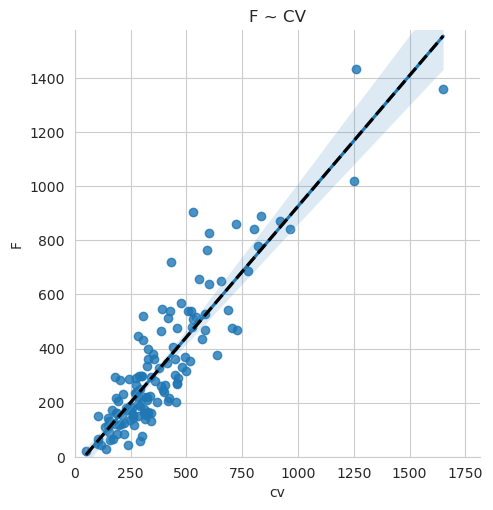

In [46]:

df = df_f_org.copy()
col = 'cv1'
max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

plt.figure(figsize=(10, 6))  # Adjust figure size

# Enable grid lines
sns.set_style("whitegrid")

ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
            x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

plt.xlabel("cv")  # Set x-axis label
plt.ylabel("F")  # Set y-axis label
plt.title("F ~ CV")  # Set plot title

plt.show()

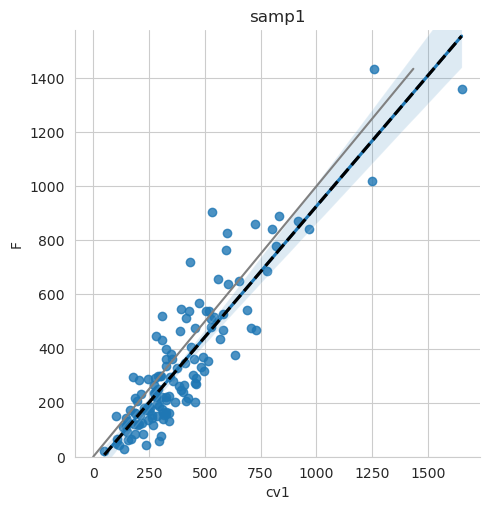

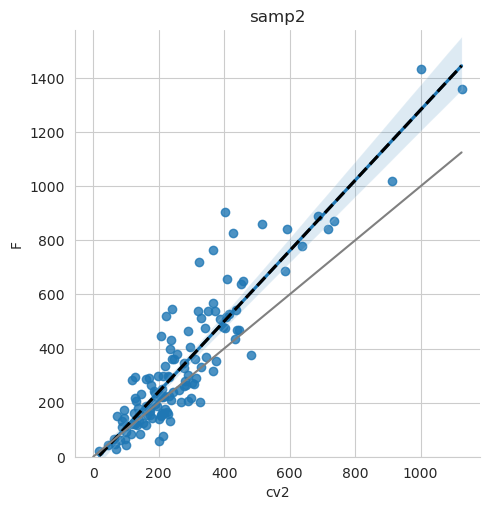

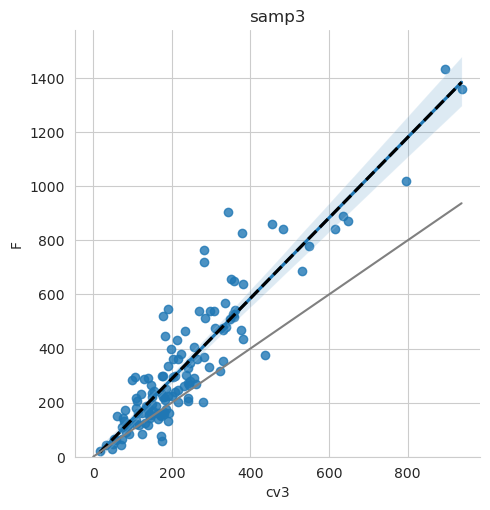

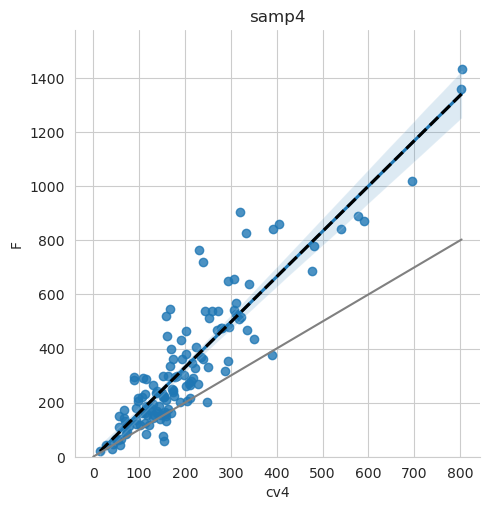

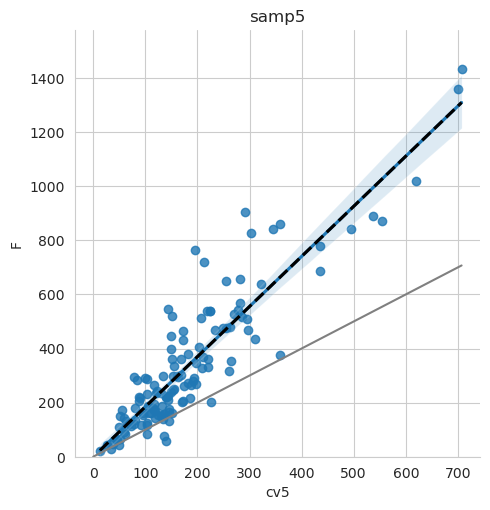

In [47]:
def plot_F_cv(df,min_samp = "", hue = None, title= "", col = ""):
    if col == "":
        col = f"cv{min_samp}"
    max_val = np.min(np.max(df[[col, "F"]].values, axis = 0))
    ax = sns.lmplot(data = df, x = col, y="F", hue = hue)
    sns.regplot(data = df, x = col, y="F", scatter_kws={'s':2}, order = 1,ci=0, ax=ax.axes[0,0],
               x_ci = 0, color = "black", line_kws={"ls":"--"},scatter=False)
    plt.plot([0, max_val], [0, max_val], color='grey')
    plt.ylim(0, np.max(df["F"]*1.1))
    plt.title(title)
    plt.show()

for i in range(1,6)    :
    plot_F_cv(df_f_org,i, title = f"samp{i}")
    

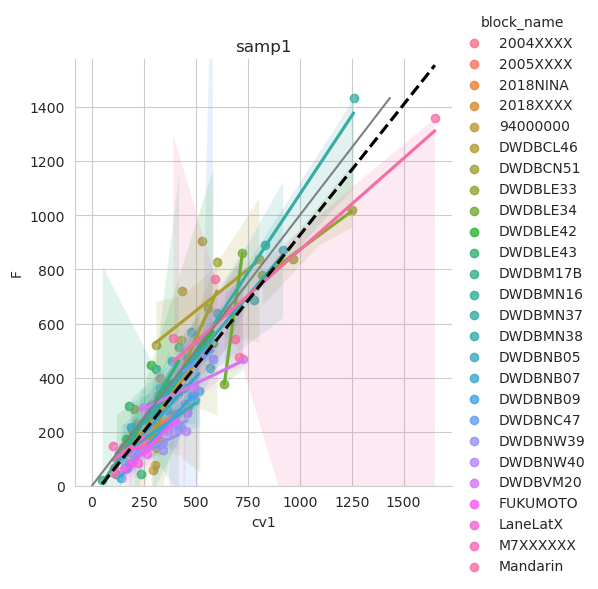

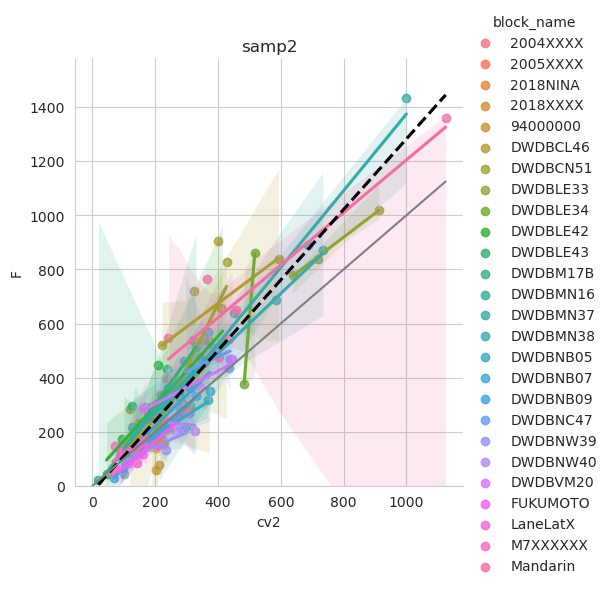

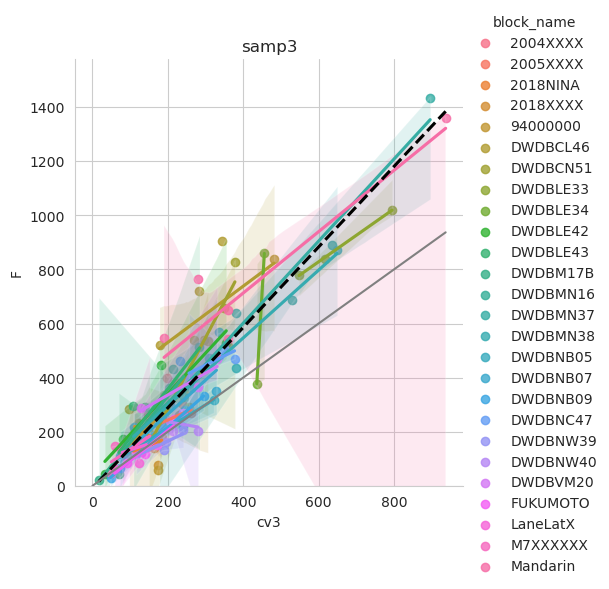

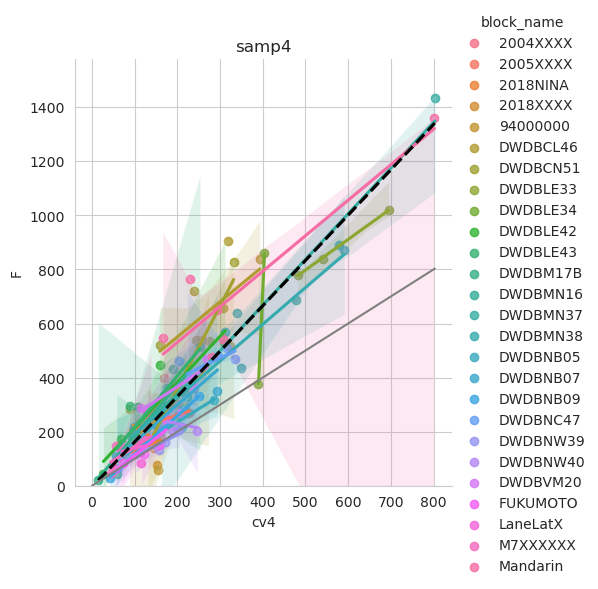

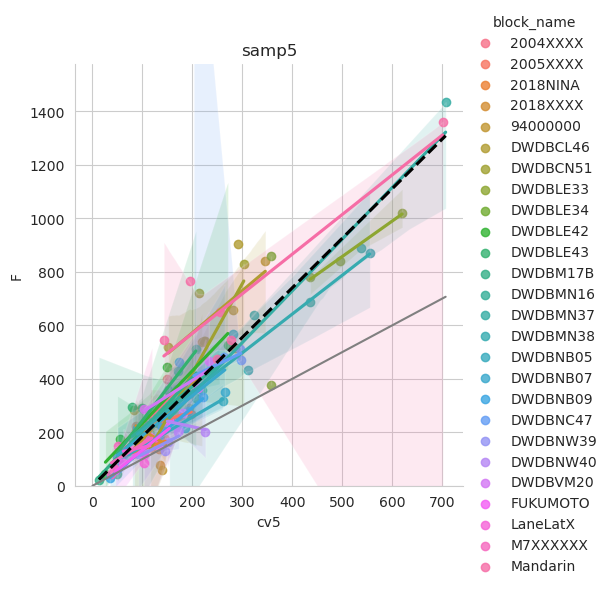

In [48]:
for i in range(1,6):
    plot_F_cv(df_f_org,i,"block_name", f"samp{i}")

### Modeling

In [49]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [50]:
def get_model_res(df, cv=1, include_fruits = True, include_interaction=True, group_col = "block_name"):
    groups = df[group_col]
    if include_fruits:
        X = df[[f"cv{cv}", "lemon", "mandarin"]]
        if include_interaction:
            X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
            X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
    else:
        X = df[[f"cv{cv}"]]
    y = df["F"]
    model = LinearRegression(fit_intercept = False)
    gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res=True)
    return gr_res, ge_std, tree_res, tree_std, preds

In [54]:
results_list = []
include_fruits = True
include_interaction=True
for include_fruits in [True, False]:
    for include_interaction in [True, False]:
        for cv in range(1,6):
            # 2 sided
            df = grouped_trees.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "2_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            # 1 side 2 trees
            df = df_f.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "1_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side A only
            df = df_f[df_f["side"] == 1].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "A", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side B only
            df = df_f[df_f["side"] == 2].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "B", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
summary_res = pd.DataFrame(results_list)   
summary_res

true: 1443.0,    pred: 1550.0363362480084. (7.42 %) (2018XXXX)
true: 5240.0,    pred: 3984.9323706573878. (23.95 %) (DWDBCL46)
true: 4340.0,    pred: 5039.970893167571. (16.13 %) (Mandarin)
true: 732.0,    pred: 629.8743973691776. (13.95 %) (M7XXXXXX)
true: 845.0,    pred: 938.5049768273605. (11.07 %) (LaneLatX)
true: 1503.0,    pred: 1600.567209270915. (6.49 %) (2005XXXX)
true: 1770.0,    pred: 1402.9241363298192. (20.74 %) (94000000)
true: 747.0,    pred: 924.1461073975249. (23.71 %) (2018NINA)
true: 1998.0,    pred: 2254.571609131304. (12.84 %) (DWDBCN51)
true: 1379.0,    pred: 1391.0040493459794. (0.87 %) (DWDBLE42)
true: 1381.0,    pred: 1358.5699426870237. (1.62 %) (DWDBLE43)
true: 1258.0,    pred: 1557.6066341579196. (23.82 %) (DWDBM17B)
true: 1677.0,    pred: 1966.072045229264. (17.24 %) (DWDBMN16)
true: 3949.0,    pred: 3620.1252263663823. (8.33 %) (DWDBMN37)
true: 2314.0,    pred: 2558.737914671054. (10.58 %) (DWDBMN38)
true: 1113.0,    pred: 1220.2374745213885. (9.63 %) (DWD

true: 1258.0,    pred: 1578.7685593209667. (25.50 %) (DWDBM17B)
true: 1677.0,    pred: 2034.7181949812584. (21.33 %) (DWDBMN16)
true: 3949.0,    pred: 4167.942811311939. (5.54 %) (DWDBMN37)
true: 2314.0,    pred: 2840.916330709882. (22.77 %) (DWDBMN38)
true: 1113.0,    pred: 1307.5893347324984. (17.48 %) (DWDBNB05)
true: 1177.0,    pred: 1073.079024742772. (8.83 %) (DWDBNB07)
true: 799.0,    pred: 946.0026502260644. (18.40 %) (DWDBNB09)
true: 744.0,    pred: 1085.4693745405127. (45.90 %) (DWDBNW39)
true: 662.0,    pred: 834.5382313823887. (26.06 %) (FUKUMOTO)
true: 1493.0,    pred: 1041.7573389394672. (30.22 %) (2004XXXX)
true: 1866.0,    pred: 1568.400947608909. (15.95 %) (DWDBNC47)
true: 913.0,    pred: 1172.7273423757915. (28.45 %) (DWDBNW40)
true: 2640.0,    pred: 2827.475652162223. (7.10 %) (DWDBLE33)
true: 1121.0,    pred: 893.6643582006053. (20.28 %) (DWDBVM20)
true: 1236.0,    pred: 1270.1923081285909. (2.77 %) (DWDBLE34)
0.3368497975669478 0.24635525653265536
true: 2886.0,    

true: 1998.0,    pred: 2327.0895652052886. (16.47 %) (DWDBCN51)
true: 1379.0,    pred: 1482.1926841041386. (7.48 %) (DWDBLE42)
true: 1381.0,    pred: 1459.9820184100083. (5.72 %) (DWDBLE43)
true: 1258.0,    pred: 1744.7538809162959. (38.69 %) (DWDBM17B)
true: 1677.0,    pred: 2092.2091377192073. (24.76 %) (DWDBMN16)
true: 3949.0,    pred: 3489.226459915282. (11.64 %) (DWDBMN37)
true: 2314.0,    pred: 2583.8233774899795. (11.66 %) (DWDBMN38)
true: 1113.0,    pred: 1339.9266951940967. (20.39 %) (DWDBNB05)
true: 1177.0,    pred: 1158.2269867436007. (1.59 %) (DWDBNB07)
true: 799.0,    pred: 1101.4016908694457. (37.85 %) (DWDBNB09)
true: 744.0,    pred: 1186.0971019843855. (59.42 %) (DWDBNW39)
true: 662.0,    pred: 1005.0892356392511. (51.83 %) (FUKUMOTO)
true: 1493.0,    pred: 1160.4457574131893. (22.27 %) (2004XXXX)
true: 1866.0,    pred: 1581.3455139711784. (15.25 %) (DWDBNC47)
true: 913.0,    pred: 1318.2924448587708. (44.39 %) (DWDBNW40)
true: 2640.0,    pred: 2538.7434853314517. (3.84

true: 7898.0,    pred: 7918.5907774475545. (0.26 %) (DWDBMN37)
true: 4628.0,    pred: 5757.88907477421. (24.41 %) (DWDBMN38)
true: 2226.0,    pred: 2541.2898956174604. (14.16 %) (DWDBNB05)
true: 2354.0,    pred: 2073.0699920301545. (11.93 %) (DWDBNB07)
true: 1598.0,    pred: 1770.212912559055. (10.78 %) (DWDBNB09)
true: 1488.0,    pred: 2034.89571565315. (36.75 %) (DWDBNW39)
true: 1324.0,    pred: 1569.650321212928. (18.55 %) (FUKUMOTO)
true: 2986.0,    pred: 2050.9608914446967. (31.31 %) (2004XXXX)
true: 3732.0,    pred: 3118.188540247233. (16.45 %) (DWDBNC47)
true: 1826.0,    pred: 2231.916623526638. (22.23 %) (DWDBNW40)
true: 5280.0,    pred: 5198.417453484037. (1.55 %) (DWDBLE33)
true: 2242.0,    pred: 1661.6364731251133. (25.89 %) (DWDBVM20)
true: 2472.0,    pred: 2535.4398450379044. (2.57 %) (DWDBLE34)
0.42144257951890157 0.3615543121180072
true: 1443.0,    pred: 1742.9993044386645. (20.79 %) (2018XXXX)
true: 5240.0,    pred: 4065.7647159042094. (22.41 %) (DWDBCL46)
true: 4340.0,

true: 2758.0,    pred: 2216.6867523011524. (19.63 %) (DWDBLE42)
true: 2762.0,    pred: 2178.021203154317. (21.14 %) (DWDBLE43)
true: 2516.0,    pred: 2160.2471682850974. (14.14 %) (DWDBM17B)
true: 3354.0,    pred: 3121.8160942090635. (6.92 %) (DWDBMN16)
true: 7898.0,    pred: 7348.624347166083. (6.96 %) (DWDBMN37)
true: 4628.0,    pred: 4718.847941078125. (1.96 %) (DWDBMN38)
true: 2226.0,    pred: 2994.802100935848. (34.54 %) (DWDBNB05)
true: 2354.0,    pred: 2499.798885736146. (6.19 %) (DWDBNB07)
true: 1598.0,    pred: 2178.1126672583214. (36.30 %) (DWDBNB09)
true: 1488.0,    pred: 2476.9076122931087. (66.46 %) (DWDBNW39)
true: 1324.0,    pred: 1920.0274938303114. (45.02 %) (FUKUMOTO)
true: 2986.0,    pred: 2455.688476802249. (17.76 %) (2004XXXX)
true: 3732.0,    pred: 3723.695420543706. (0.22 %) (DWDBNC47)
true: 1826.0,    pred: 2678.0487246609546. (46.66 %) (DWDBNW40)
true: 5280.0,    pred: 5573.172849751424. (5.55 %) (DWDBLE33)
true: 2242.0,    pred: 2090.8591488685765. (6.74 %) (D

true: 1493.0,    pred: 1558.0001674470554. (4.35 %) (2004XXXX)
true: 1866.0,    pred: 1735.692791612715. (6.98 %) (DWDBNC47)
true: 913.0,    pred: 1479.4496859054004. (62.04 %) (DWDBNW40)
true: 2640.0,    pred: 2812.7451381554583. (6.54 %) (DWDBLE33)
true: 1121.0,    pred: 1175.054034171622. (4.82 %) (DWDBVM20)
true: 1236.0,    pred: 1239.9201311199622. (0.32 %) (DWDBLE34)
0.45478791982150085 0.25385491986276576
true: 1443.0,    pred: 1477.7519912538778. (2.41 %) (2018XXXX)
true: 5240.0,    pred: 3578.81858045063. (31.70 %) (DWDBCL46)
true: 4340.0,    pred: 3671.9475861296823. (15.39 %) (Mandarin)
true: 732.0,    pred: 832.4020602209764. (13.72 %) (M7XXXXXX)
true: 845.0,    pred: 1143.0389997326172. (35.27 %) (LaneLatX)
true: 1503.0,    pred: 1720.935840101236. (14.50 %) (2005XXXX)
true: 1770.0,    pred: 1342.9970736882942. (24.12 %) (94000000)
true: 747.0,    pred: 968.2211610475649. (29.61 %) (2018NINA)
true: 1998.0,    pred: 1521.8765245345705. (23.83 %) (DWDBCN51)
true: 1379.0,    

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std,include_fruits,include_interaction
0,2_sided,1,0.167962,0.113204,0.387880,0.287163,True,True
1,1_sided,1,0.172497,0.106337,0.448067,0.364745,True,True
2,A,1,0.165875,0.117606,0.459142,0.386567,True,True
3,B,1,0.198723,0.123092,0.424279,0.339963,True,True
4,2_sided,2,0.149250,0.109381,0.338146,0.233830,True,True
5,1_sided,2,0.154184,0.105762,0.411244,0.325104,True,True
6,A,2,0.164008,0.103977,0.438999,0.368254,True,True
7,B,2,0.178229,0.129231,0.370786,0.269021,True,True
8,2_sided,3,0.157264,0.106302,0.336850,0.246355,True,True
9,1_sided,3,0.158475,0.110560,0.417889,0.345937,True,True


In [56]:
summary_res.iloc[:20, :-2].round(2)

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std
0,2_sided,1,0.17,0.11,0.39,0.29
1,1_sided,1,0.17,0.11,0.45,0.36
2,A,1,0.17,0.12,0.46,0.39
3,B,1,0.20,0.12,0.42,0.34
4,2_sided,2,0.15,0.11,0.34,0.23
5,1_sided,2,0.15,0.11,0.41,0.33
6,A,2,0.16,0.10,0.44,0.37
7,B,2,0.18,0.13,0.37,0.27
8,2_sided,3,0.16,0.11,0.34,0.25
9,1_sided,3,0.16,0.11,0.42,0.35


In [217]:
# cv = 1
# df = grouped_trees.copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)


In [218]:
# df = df_f.reset_index(drop=True).copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)